## Data
* ГОСТ (1236 + 469 = 1705)
* [kaggle elibrary articles](https://www.kaggle.com/datasets/ergkerg/russian-scientific-articles) (2454)

## Preprocessing
* getting words only
* removing stop-words
* stamming


code: data_reader.py

preprocessing results (min_df=0.1, max_df=0.65)

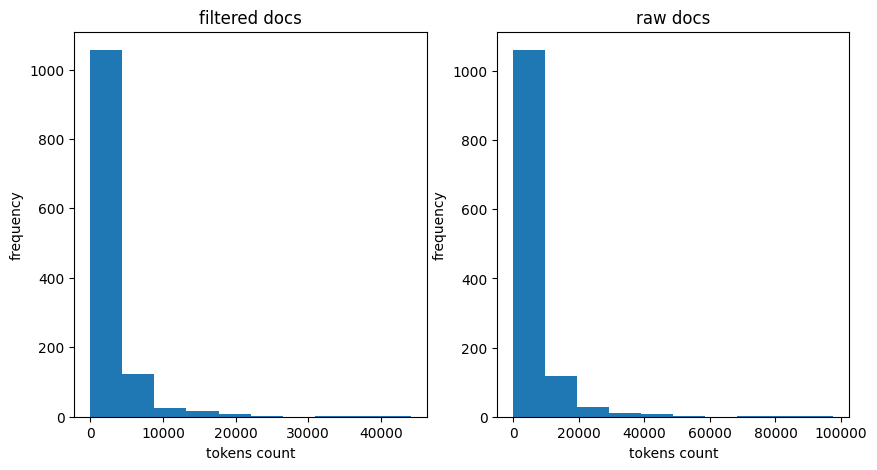

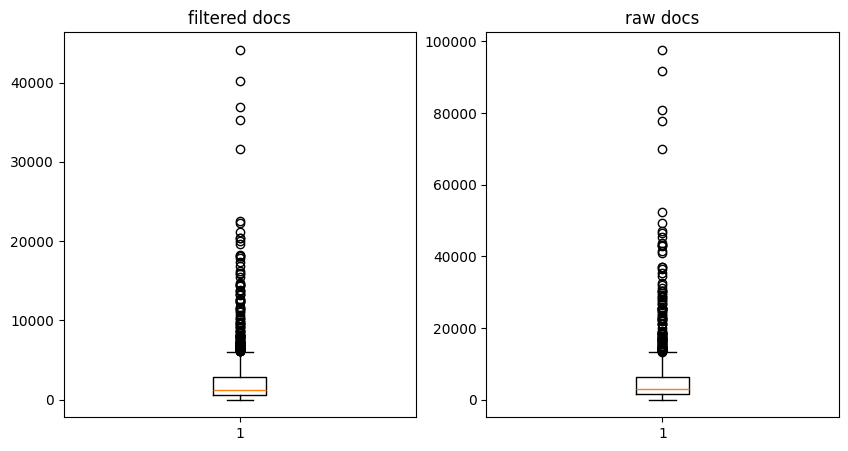

## Graph constructing
Using NetworkX, texts as nodes, for edges:
1. Jaccard similarity (common.py)
2. word2vec cosine similarity (word2vecsim)
3. LDA ([article](https://core.ac.uk/download/pdf/188184469.pdf)), presumably too little data
4. Graphs normalized value similarity (from [article](https://www.acl-bg.org/proceedings/2017/RANLP%202017/pdf/RANLP098.pdf))
5. doc2vec cosine similarity (bert-based)


## Topic modeling/clustering

For not categorized texts:
* TF-IDF (common.py)

Clustering for categorized texts:
* Louvain algorithm

In [1]:
import pickle
import community.community_louvain as community_louvain

with open('full_graph.pickle', 'rb') as f:
    full_graph = pickle.load(f)

partition = community_louvain.best_partition(full_graph)

communities = {}
for node, community_id in partition.items():
    if community_id not in communities:
        communities[community_id] = [node]
    else:
        communities[community_id].append(node)

for community_id, nodes in communities.items():
    print(f'Community {community_id}: {nodes}')

Community 8: ['Автоматика. Вычислительная техника-16372957_15340402.csv', 'Автоматика. Вычислительная техника-23286146_33292062.csv', 'Автоматика. Вычислительная техника-23339554_86262643.csv', 'Автоматика. Вычислительная техника-25321882_27801644.csv', 'Автоматика. Вычислительная техника-25995059_76699044.csv', 'Автоматика. Вычислительная техника-26460824_61982858.csv', 'Автоматика. Вычислительная техника-28301283_69362924.csv', 'Автоматика. Вычислительная техника-28399372_27529733.csv', 'Автоматика. Вычислительная техника-28399374_33189065.csv', 'Автоматика. Вычислительная техника-29877246_63372628.csv', 'Автоматика. Вычислительная техника-32660194_43149545.csv', 'Автоматика. Вычислительная техника-35560829_86623818.csv', 'Автоматика. Вычислительная техника-36295616_67734200.csv', 'Автоматика. Вычислительная техника-36400296_69140450.csv', 'Автоматика. Вычислительная техника-36807091_67702615.csv', 'Автоматика. Вычислительная техника-36807099_51617257.csv', 'Автоматика. Вычислительна

* Markov clustering

In [1]:
from collections import defaultdict
import markov_clustering as mc
import networkx as nx
import re

matrix = nx.to_scipy_sparse_matrix(full_graph)
result = mc.run_mcl(matrix)
clusters = mc.get_clusters(result)

cluster_dict = {}
graph_nodes = list(full_graph.nodes)
for cluster in clusters:
    categories = defaultdict(int)
    for i in range(len(cluster)):
        node = graph_nodes[i]
        category = re.search(r".*(?=-)", node).group()
        categories[category] += 1
    cluster_dict[len(cluster_dict)] = categories
cluster_dict

C:\Users\Alexandra\AppData\Local\Temp\ipykernel_12644\3685166673.py:13: DeprecationWarning: 

The scipy.sparse array containers will be used instead of matrices
in Networkx 3.0. Use `to_scipy_sparse_array` instead.
  matrix = nx.to_scipy_sparse_matrix(full_graph)


{0: defaultdict(int,
             {'Автоматика. Вычислительная техника': 28,
              'Астрономия': 18,
              'Биология': 13,
              'Биотехнология': 56,
              'Внешняя торговля': 55,
              'Внутренняя торговля. Туристско-экскурсионное обслуживание': 30,
              'Водное хозяйство': 39,
              'Военное дело': 62,
              'География': 39,
              'Геодезия. Картография': 43,
              'Геология': 17,
              'Геофизика': 40,
              'Горное дело': 37,
              'Государство и право. Юридические науки': 25,
              'Демография': 18,
              'Жилищное хозяйство и коммунальная инфраструктура': 31,
              'Информатика': 33,
              'Искусство. Искусствоведение': 32,
              'История. Исторические науки': 33,
              'Кибернетика': 30,
              'Комплексные проблемы общественных наук': 45,
              'Космические исследования': 48,
              'Культура. Культурологи

## Measuring results
Metrics for non-categorized texts:
* words cloud
* topic coherence (average pairwise word similarity among topic)

## Extrating topics from cluster
* Lets concatenate all docs among cluster and build tfidf on this collection. Top-k words in each collection will be our topic words